## Classification

In [14]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Solved By https://github.com/ageron/handson-ml/issues/143
* nil12285

In [35]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [36]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [37]:
y.shape

(70000,)

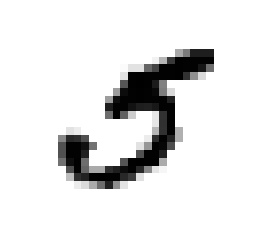

In [38]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [39]:
y[36000]

5.0

In [40]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [41]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [42]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [43]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_clif = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clif.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [45]:
sgd_clif.predict([some_digit])

array([ True], dtype=bool)

## 성능 측정

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clif, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([ 0.9539,  0.9668,  0.9549])

In [47]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [48]:
never_5_clf = Never5Classifier()

In [49]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9091 ,  0.91085,  0.909  ])

불균형한 데이터를 다룰때는 __Accuracy__를 성능 측정 지표로 사용하지 않는다.  
위의 예처럼, 5가 데이터의 10%미만인 훈련데이터에 대해서 무조건 5가 아니라고만 답해도 그 성능은 90% 이상이 나올 수 있기 때문이다.

##### Confusion Matrix(오차 행렬)
클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것

In [57]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clif, X_train, y_train_5, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54269,   310],
       [ 2178,  3243]])

| TN | FP |
| ---
| FN | TP | 

310: 정답이 5가 아닌데 5라고 분류한 수, 2178:정답이 5인데 5가 아니라고 분류한 수  

In [59]:
#perfect
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

|   | Positive라고 예측 | Negative라고 예측  |   |   |
|---|---|---|---|---|
| __Positive__  | True Positive  | False Negative  |   |   |
| __Negative__  | False Positive  | True Negative  |   |   |

#### 정밀도와 재현율

In [60]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.91274978891077962

In [61]:
recall_score(y_train_5, y_train_pred)

0.59822910902047588